In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Day 1 Students files/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [ ]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
# veri normal dağılmışsa mean alınır normal dağılmamışsa median alınır

In [ ]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    46.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
train1 = train[['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked']]

In [ ]:
train2 = pd.get_dummies(train1, drop_first= True)#drop_first=True ile bir sütunu siler.
train2.head()

,Survived,Pclass,Age,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,2,1,0,1
1,1,1,38.0,2,0,0,0
2,1,3,26.0,1,0,0,1
3,1,1,35.0,2,0,0,1
4,0,3,35.0,1,1,0,1


**************************************************************************************************

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x = np.arange(20)
y = np.random.normal(10,1,20)
z = np.random.normal(10,2,20)

In [ ]:
print(x)
print(y)
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 9.66600901 10.05327209 10.72614993 10.08140705  9.80250687 10.04083034
 10.74172463  8.93307105  9.30668368  8.19208267  9.18305365  9.50110809
  9.23035449  8.53294643  9.22782442  9.69997483  9.17514889  9.67760772
 10.11918916  8.546176  ]
[ 8.2643083  11.05015908  9.07533932  7.43585534  6.91375524  8.59040059
 10.3827434   5.75355047  9.63429344  4.16144724  8.96628222 11.21596288
  8.70608291  6.58377971 12.30450346 10.1473746  10.48135487  7.68987461
 11.74331685 10.78934813]


Text(0, 0.5, 'y')

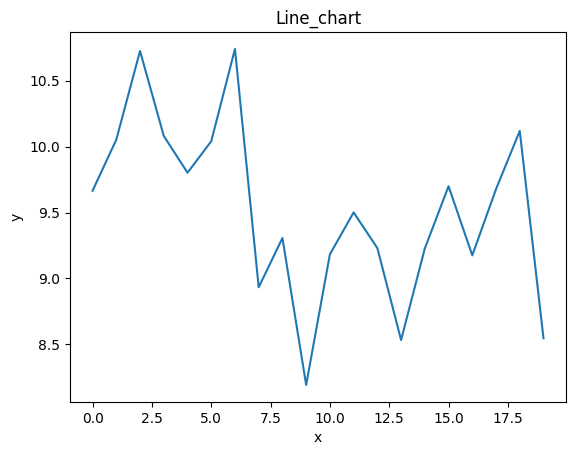

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_title('Line_chart')
ax.set_xlabel('x')
ax.set_ylabel('y')

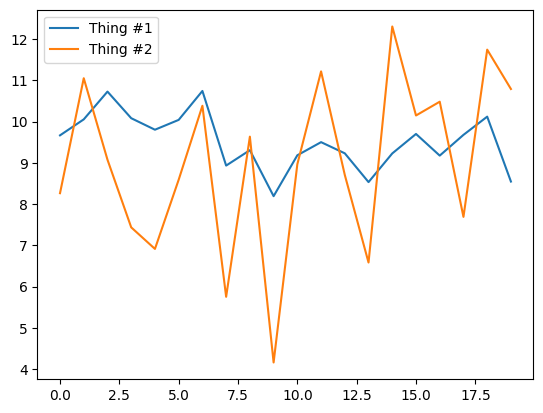

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y, label='Thing #1')
ax.plot(x,z, label='Thing #2')
ax.legend();

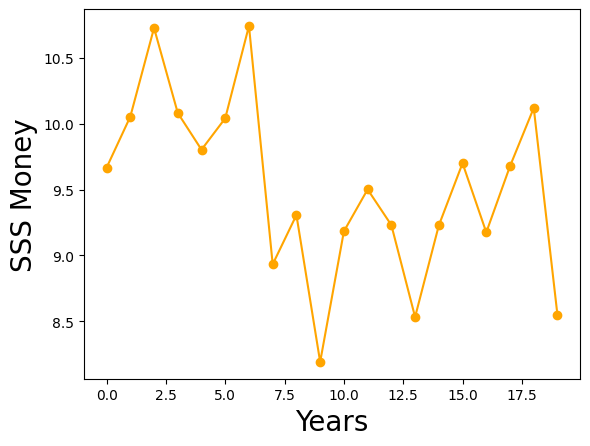

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y,marker='o',c='orange')
ax.set_ylabel('SSS Money', fontsize=20)
ax.set_xlabel('Years', fontsize=20)
fig.savefig('figure.png', dpi=300)

Text(0.5, 0.98, 'Visualization')

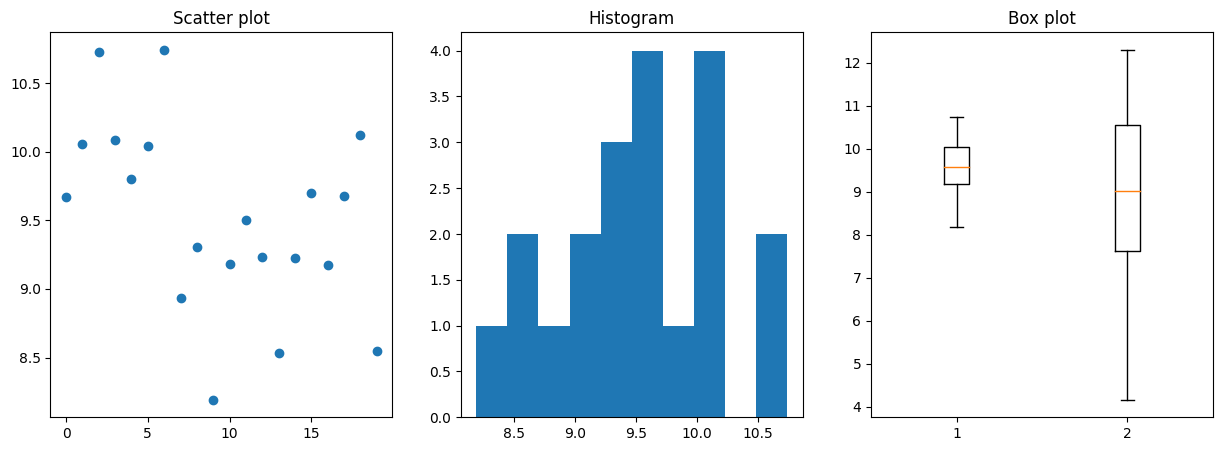

In [ ]:
fig2 = plt.figure(figsize=(15,5))
a = fig2.add_subplot(131)
a.scatter(x,y)
a.set_title('Scatter plot')

b = fig2.add_subplot(132)
b.hist(y)
b.set_title('Histogram')

c = fig2.add_subplot(133)
c.boxplot([y,z])
c.set_title('Box plot')

fig.suptitle('Visualization')

<Axes: title={'center': 'Scatter plot'}, xlabel='Age', ylabel='Fare'>

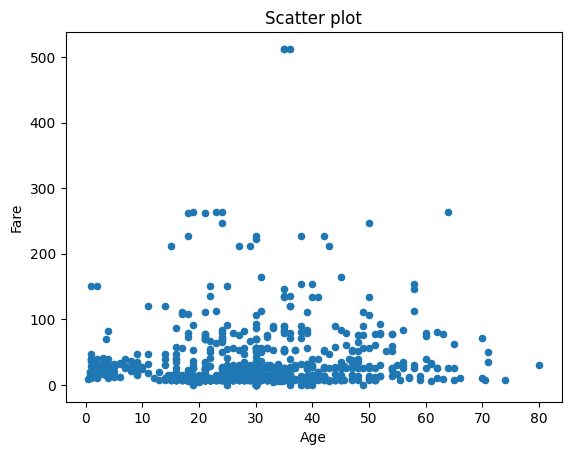

In [ ]:
train.plot.scatter(x='Age',y='Fare', title='Scatter plot')

<Axes: title={'center': 'Line chart'}>

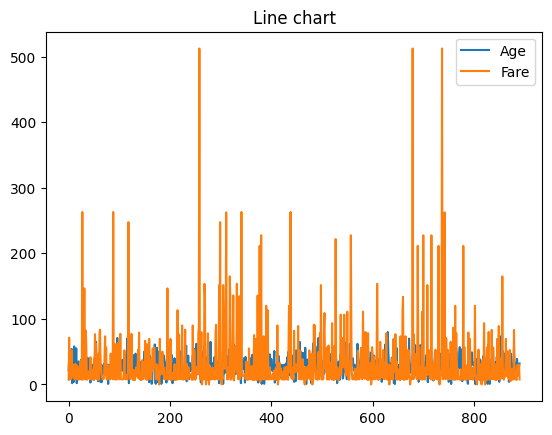

In [ ]:
train[['Age', 'Fare']].plot.line(title='Line chart')

<Axes: ylabel='Frequency'>

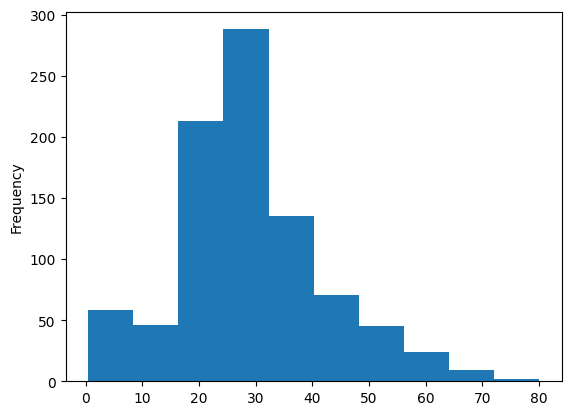

In [ ]:
train['Age'].plot.hist()#normal dağılım yok

<Axes: >

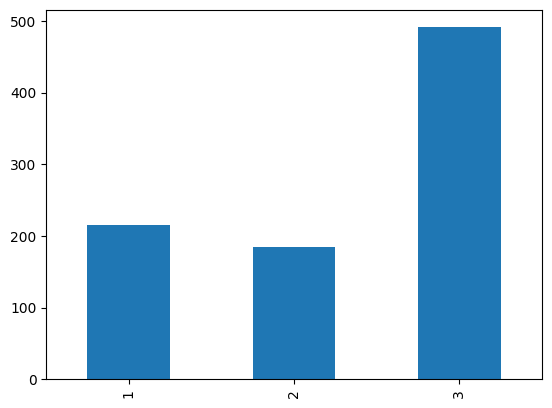

In [ ]:
train['Pclass'].value_counts().sort_index().plot.bar()

<Axes: >

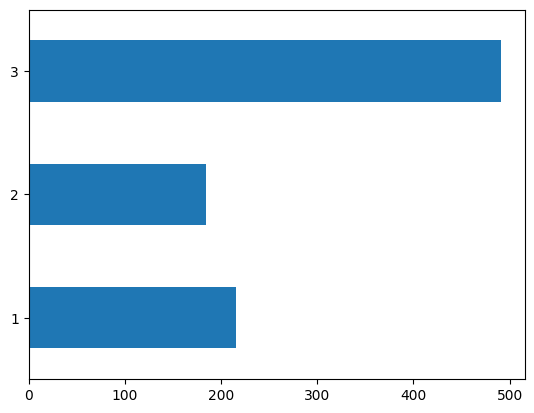

In [ ]:
train['Pclass'].value_counts().sort_index().plot.barh()

<Axes: >

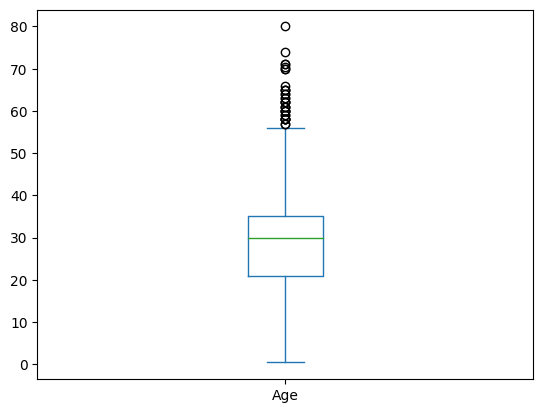

In [ ]:
train['Age'].plot.box()

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

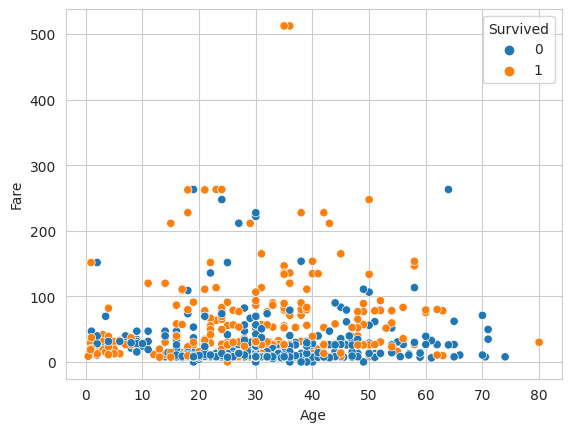

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train);

<Axes: >

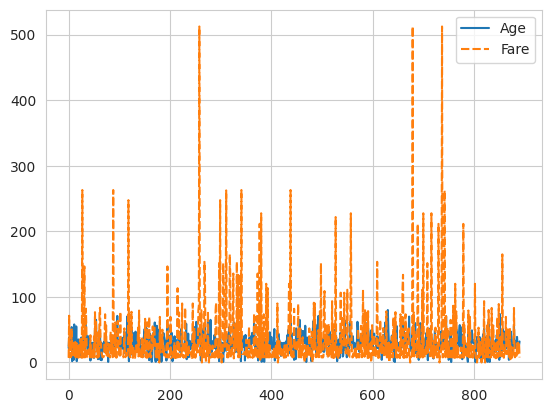

In [ ]:
sns.lineplot(data=train[['Age','Fare']])

<Axes: xlabel='Age', ylabel='Density'>

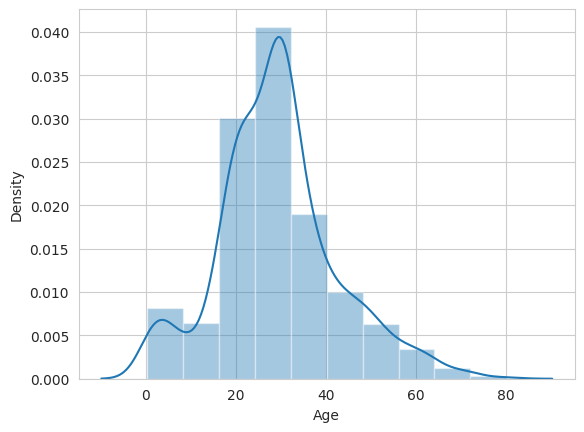

In [ ]:
sns.distplot(train['Age'], bins=10, kde=True)

<Axes: >

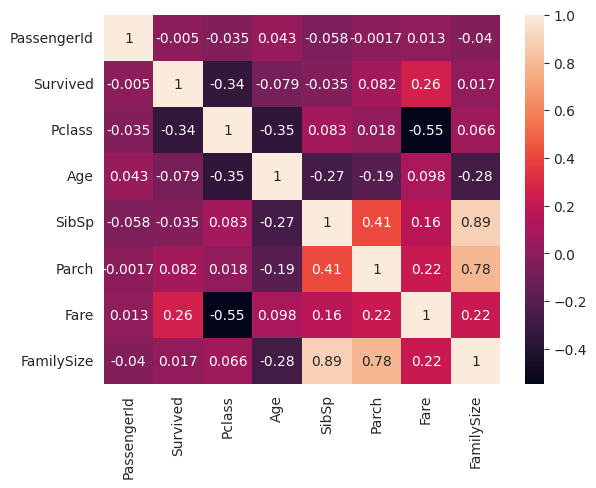

In [ ]:
sns.heatmap(train.corr(),annot=True)

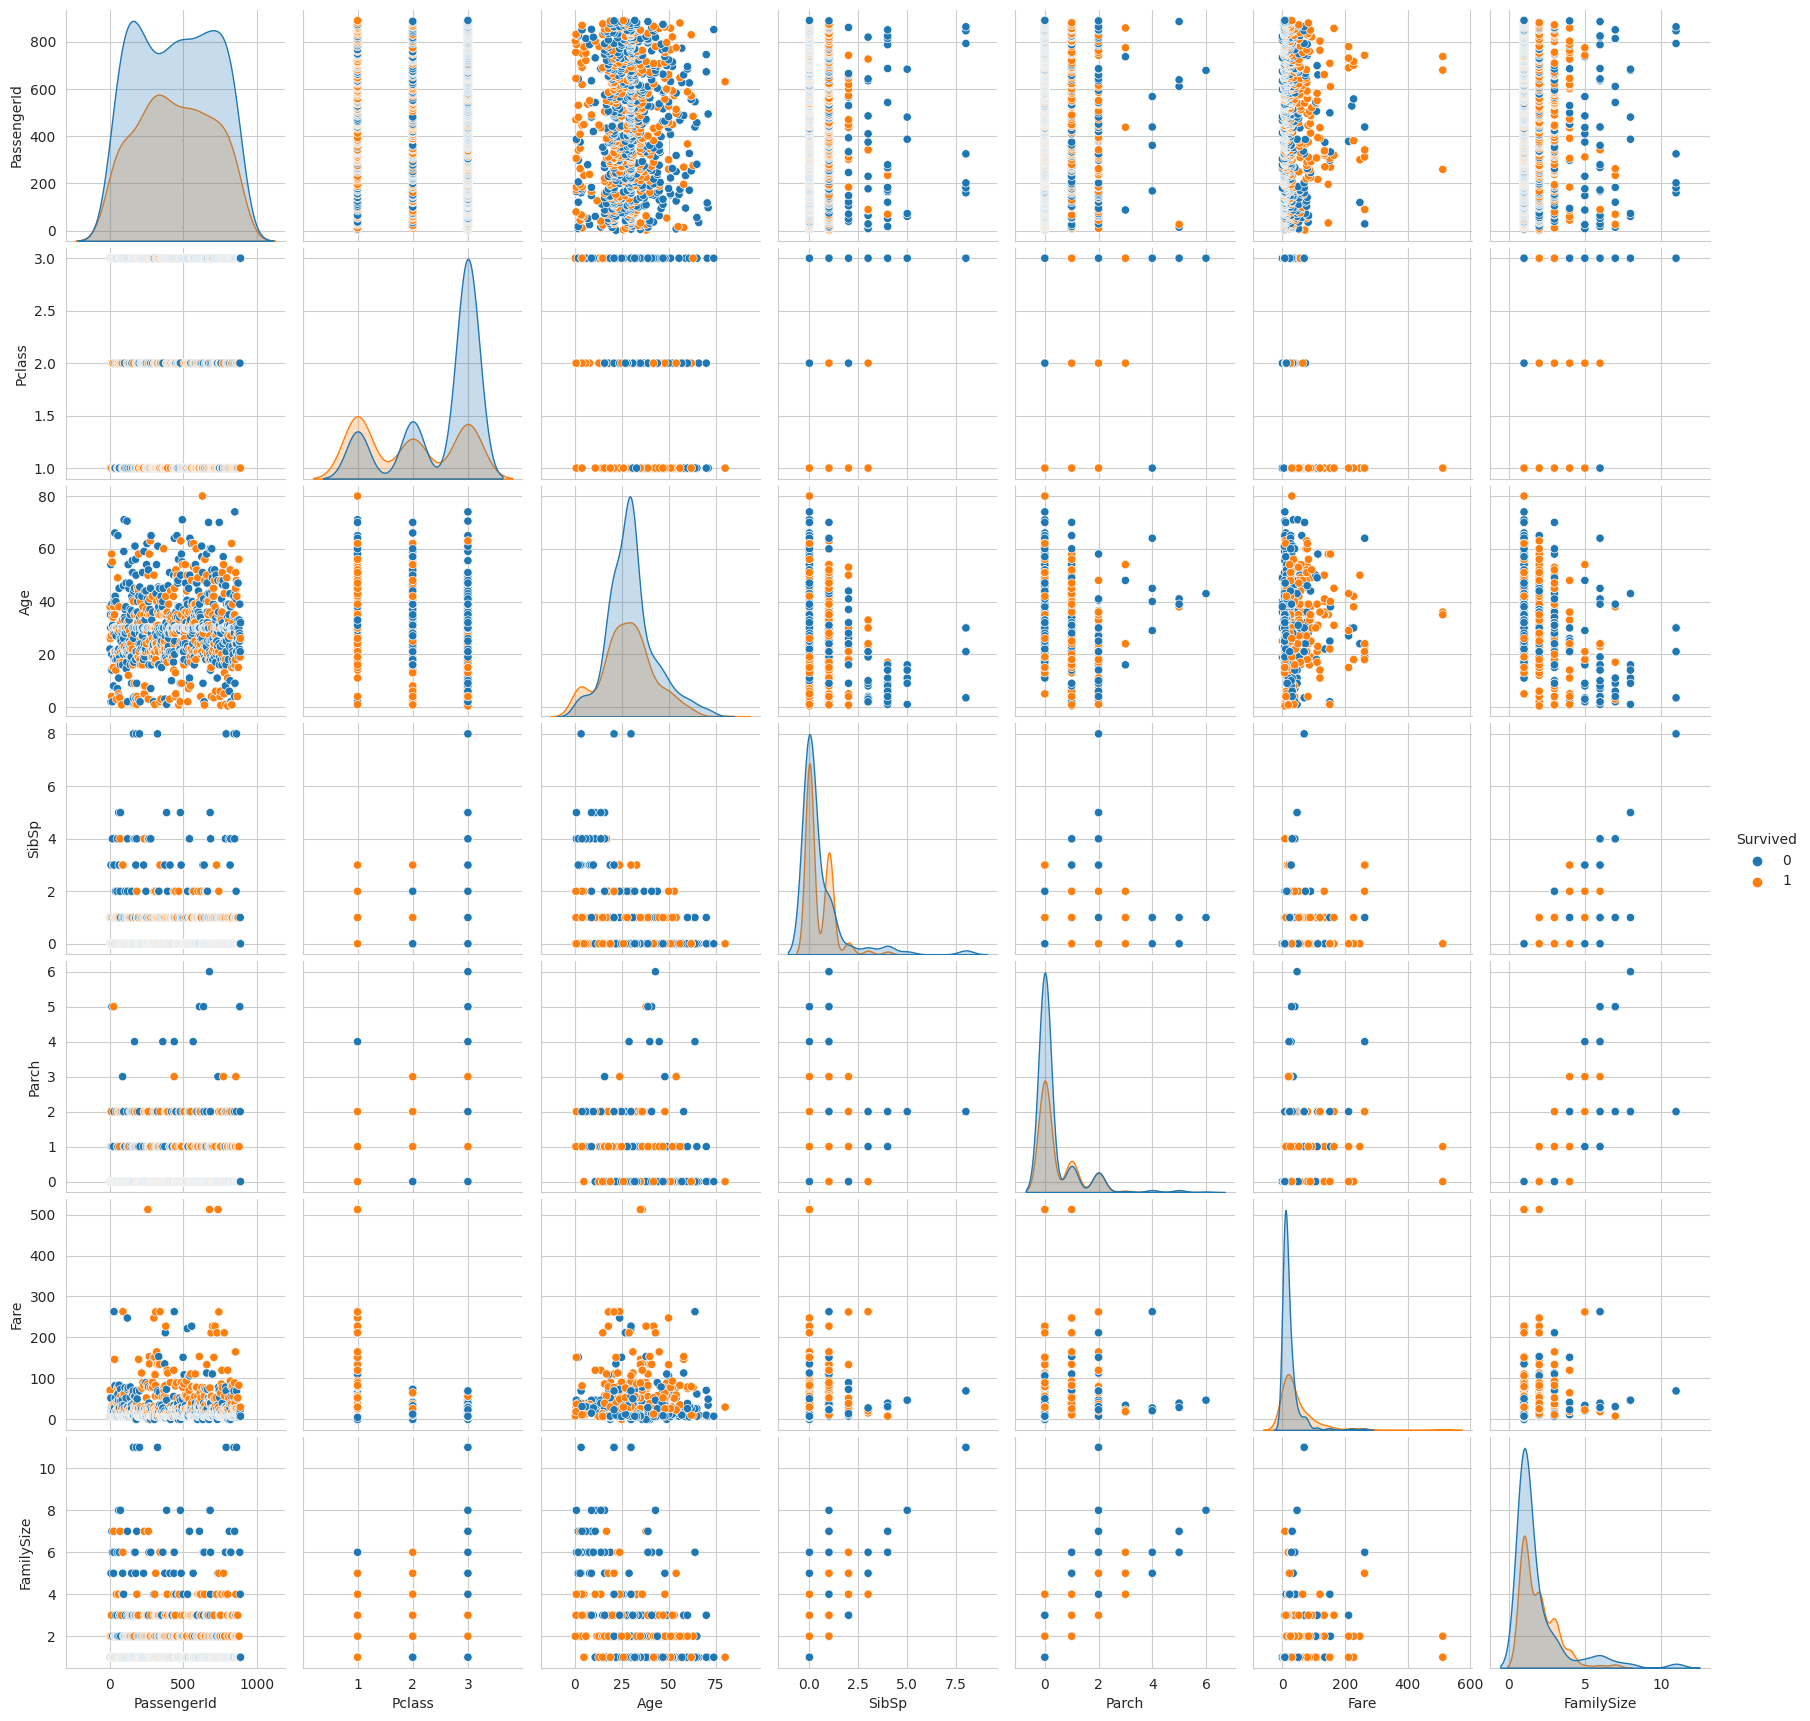

In [ ]:
sns.pairplot(train, hue='Survived')
plt.savefig('Pairplot.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/supermarket/supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**EDA**

In [ ]:
df.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
457,533-33-5337,B,Mandalay,Normal,Male,Electronic accessories,79.39,10,39.695,833.595,2/7/2019,20:24,Cash,793.9,4.761905,39.695,6.2


In [ ]:
df.sample(10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df.Total.max()

1042.65

In [ ]:
df['Total'].max()

1042.65

In [ ]:
df['Total'].max(),
df['Total'].min()
df['Total'].std()
df['Total'].var(), df['Total'].mean()

(60459.598017717224, 322.966749)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [ ]:
df['month_name'] = df['Date'].dt.month_name()

In [ ]:
df['weekday'] = df['Date'].dt.day_name()

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df['Hour'] = (df['Time']).dt.hour

In [ ]:
import seaborn as sns

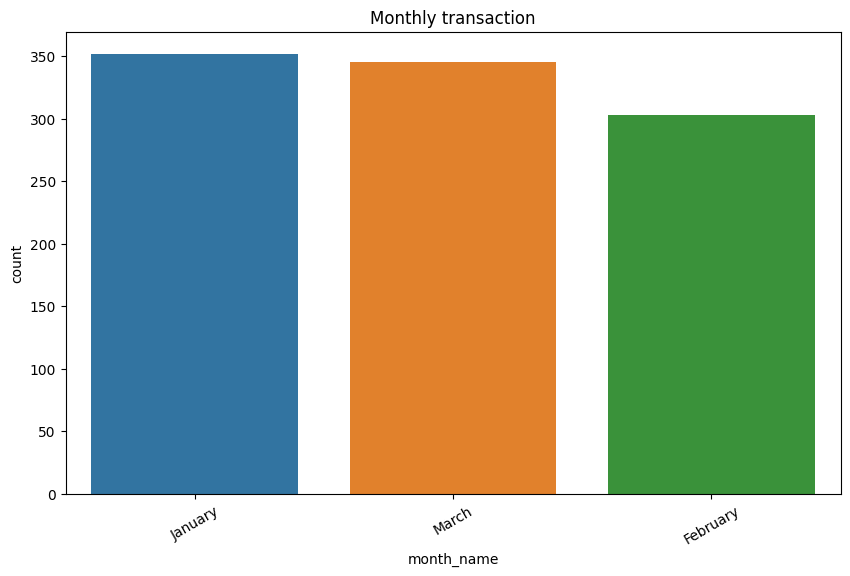

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Monthly transaction')
sns.countplot(data= df, x='month_name', order=df['month_name'].value_counts().index)
plt.xticks(rotation=30);

In [ ]:
df['gender_name'] = df['Gender']

<Axes: title={'center': 'Male vs Female Customers'}, xlabel='gender_name', ylabel='count'>

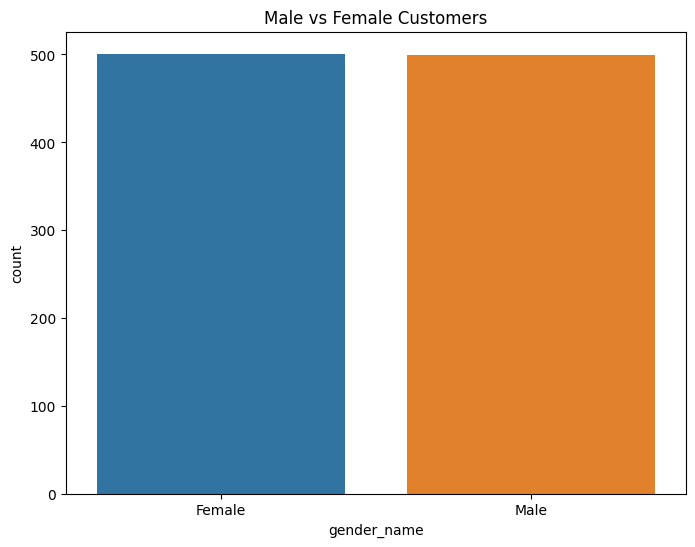

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Male vs Female Customers')
sns.countplot(data= df, x='gender_name', order=df['gender_name'].value_counts().index)

In [ ]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
df['month_name'].value_counts()

January     352
March       345
February    303
Name: month_name, dtype: int64

In [ ]:
df['weekday'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

<Axes: xlabel='weekday', ylabel='count'>

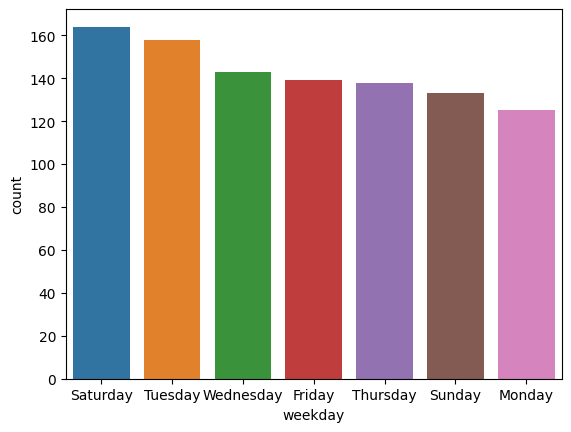

In [ ]:
sns.countplot(data= df, x='weekday', order=df['weekday'].value_counts().index)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

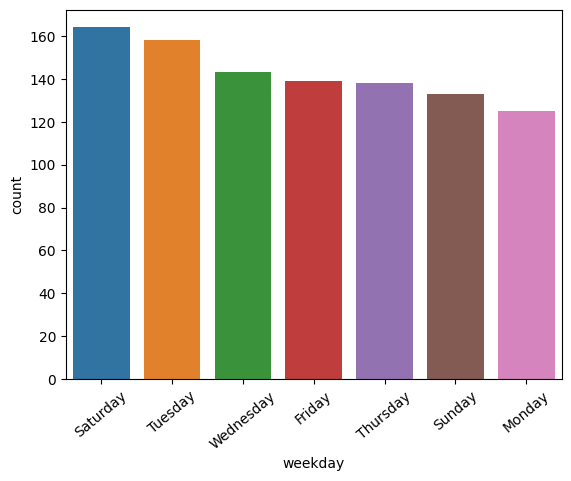

In [ ]:
sns.countplot(data= df, x='weekday', order=df['weekday'].value_counts().index)
plt.xticks(rotation=40)

Text(0.5, 1.0, 'Transaction Per Mont')

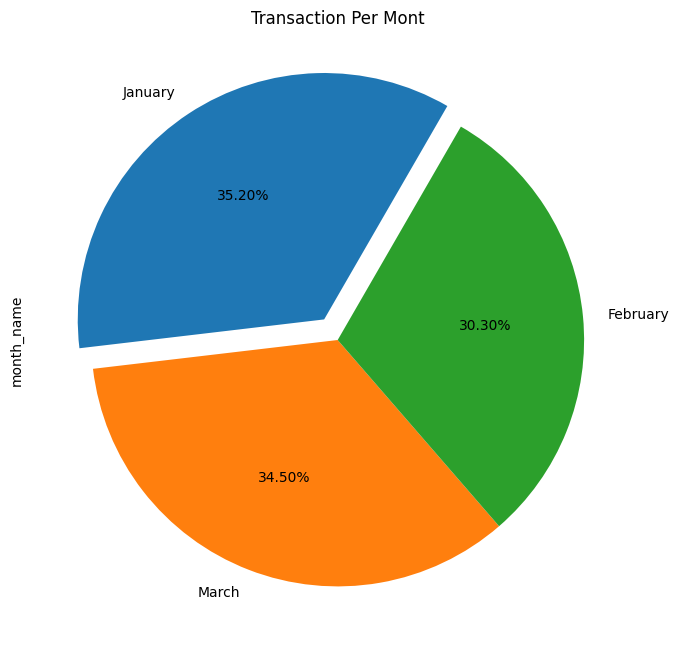

In [ ]:
plt.figure(figsize=(8,8))
explode=(0.1,0.0,0.0)
df['month_name'].value_counts().plot.pie(autopct='%1.2f%%', startangle=60,explode=explode)
plt.title('Transaction Per Mont')

Text(0.5, 1.0, 'Transaction Per Mont')

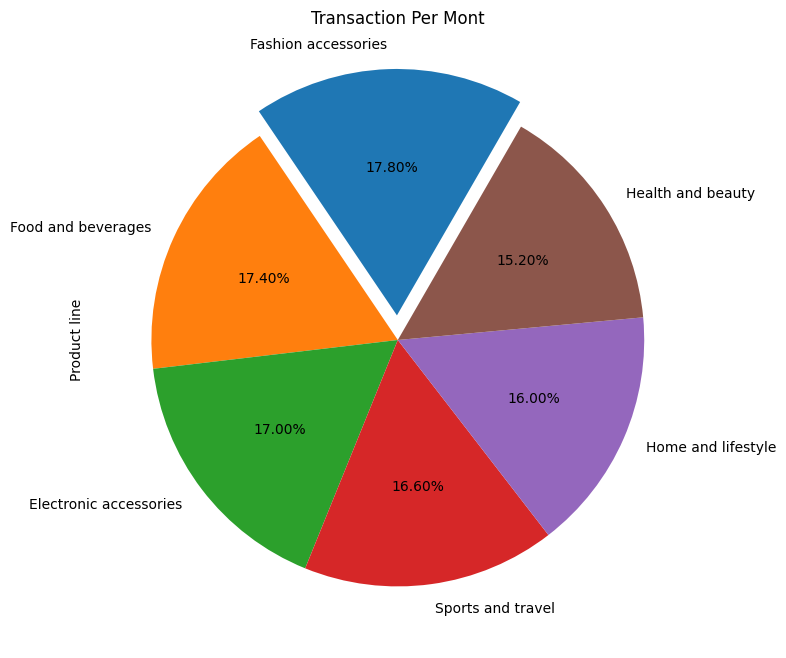

In [ ]:
plt.figure(figsize=(8,8))
explode=(0.1,0.0,0.0,0,0,0)
df['Product line'].value_counts().plot.pie(autopct='%1.2f%%', startangle=60,explode=explode)
plt.title('Transaction Per Mont')

<Axes: xlabel='Product line', ylabel='count'>

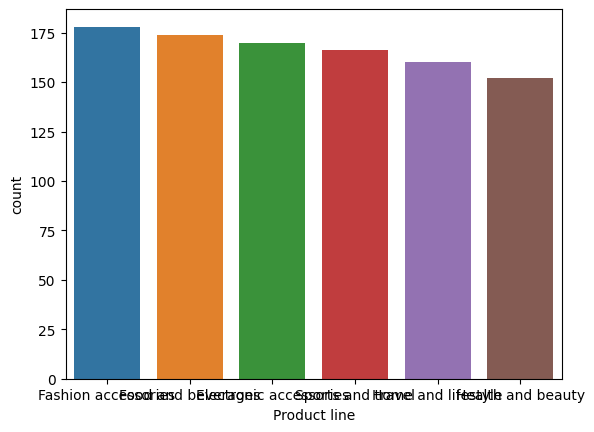

In [ ]:
sns.countplot(data= df, x='Product line', order=df['Product line'].value_counts().index)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fashion accessories'),
  Text(1, 0, 'Food and beverages'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

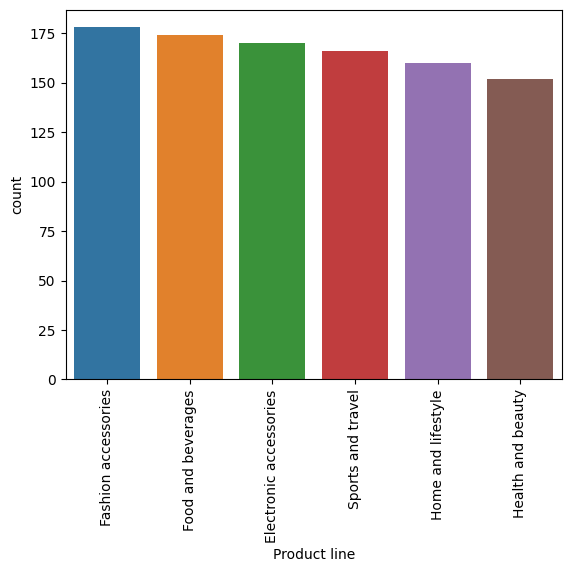

In [ ]:
sns.countplot(data= df, x='Product line', order=df['Product line'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fashion accessories'),
  Text(1, 0, 'Food and beverages'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

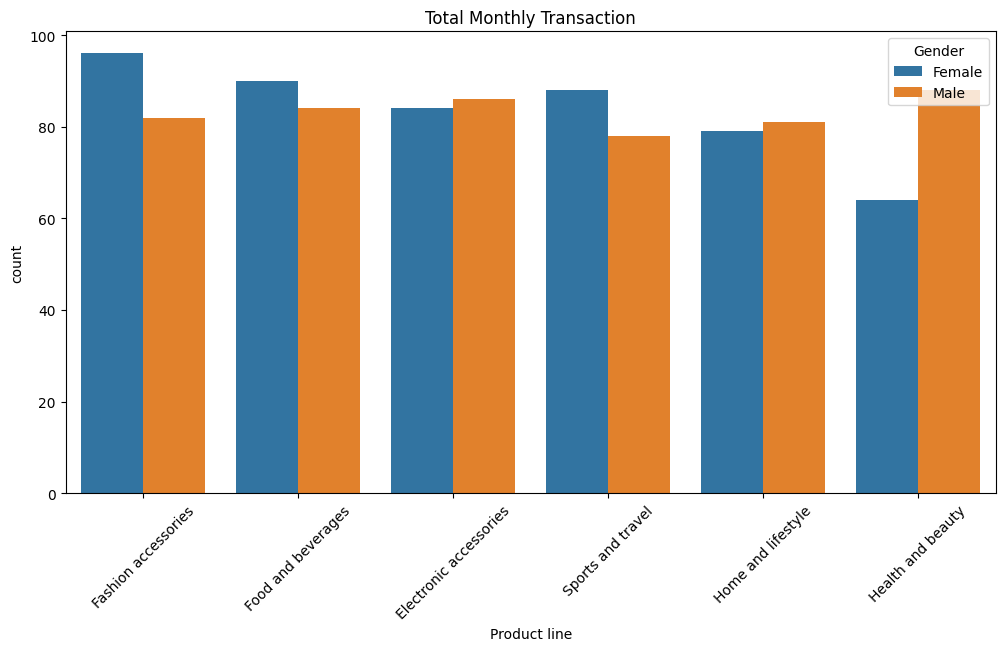

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Total Monthly Transaction')
sns.countplot(data= df, x='Product line', order=df['Product line'].value_counts().index, hue=df.Gender)
plt.xticks(rotation=45)


<Axes: title={'center': 'Total Monthly Transaction'}, xlabel='Branch', ylabel='count'>

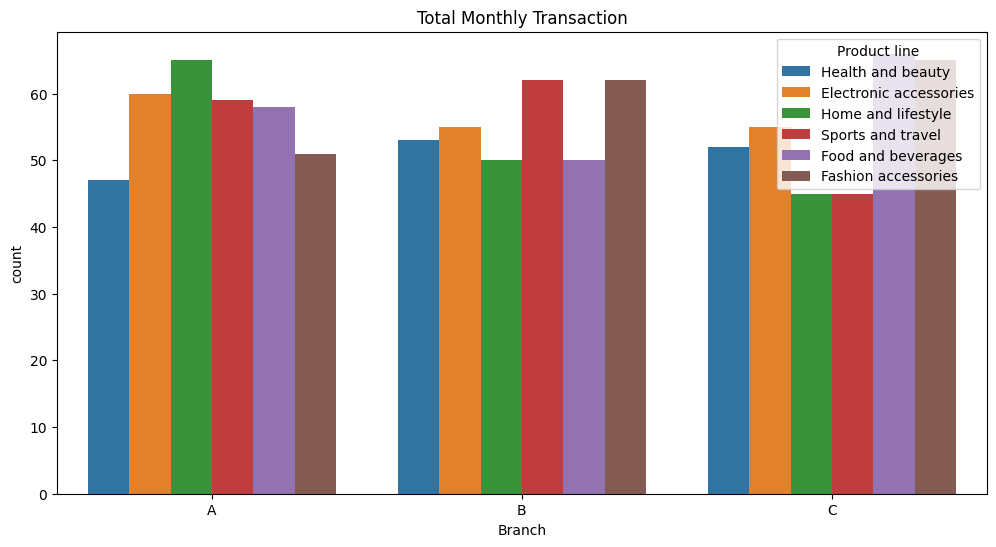

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Total Monthly Transaction')
sns.countplot(data= df, x='Branch', order=df['Branch'].value_counts().index, hue=df['Product line'])



<Axes: title={'center': 'Count plot of customer types'}, xlabel='Customer type', ylabel='count'>

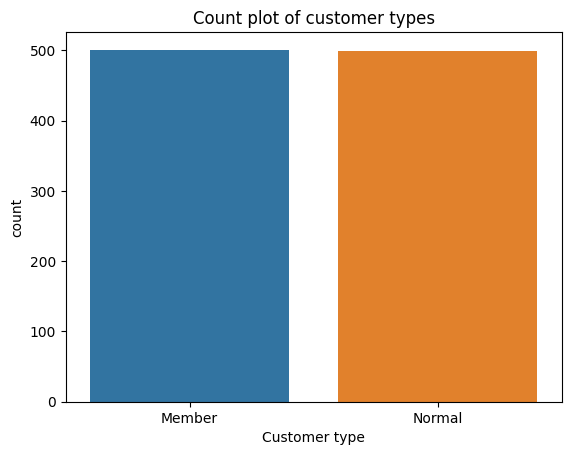

In [ ]:
plt.title('Count plot of customer types')
sns.countplot(data= df, x='Customer type', order=df['Customer type'].value_counts().index)


<Axes: title={'center': 'Total Monthly Transaction'}, xlabel='City', ylabel='count'>

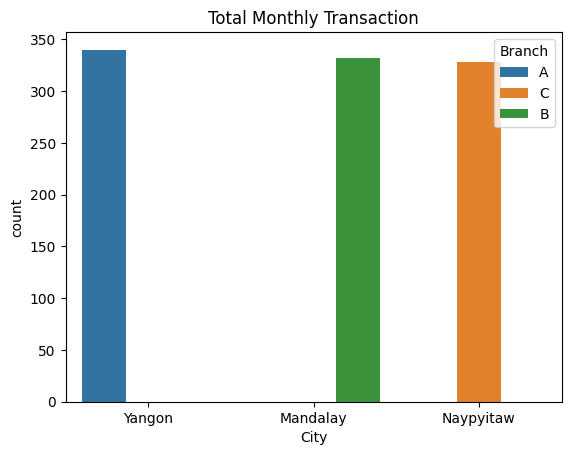

In [ ]:
plt.title('Total Monthly Transaction')
sns.countplot(data= df, x='City', order=df['City'].value_counts().index, hue=df['Branch'])

<Axes: xlabel='City'>

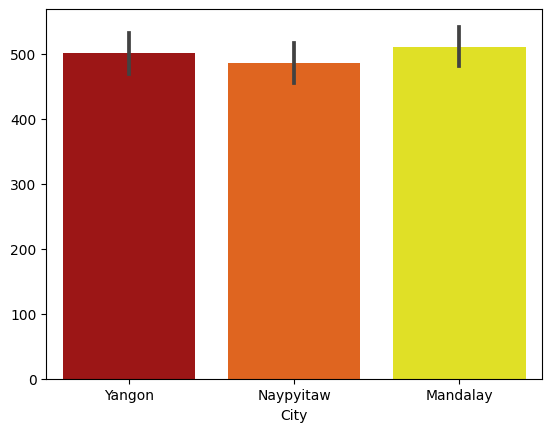

In [ ]:
sns.barplot(x=df['City'], y=df.index, palette='hot')

<Axes: title={'center': 'Frewuency of purchases genderwise'}, xlabel='City', ylabel='count'>

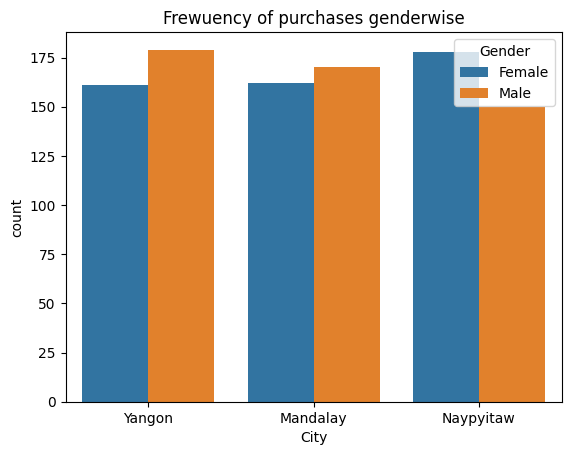

In [ ]:
plt.title('Frewuency of purchases genderwise')
sns.countplot(data= df, x='City', order=df['City'].value_counts().index, hue=df['Gender'])

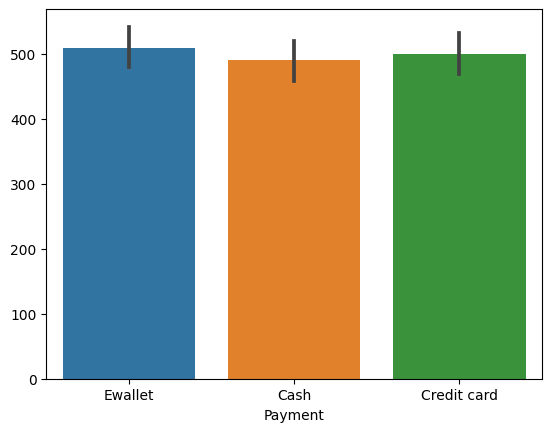

In [ ]:
sns.barplot(x=df.Payment, y=df.index);

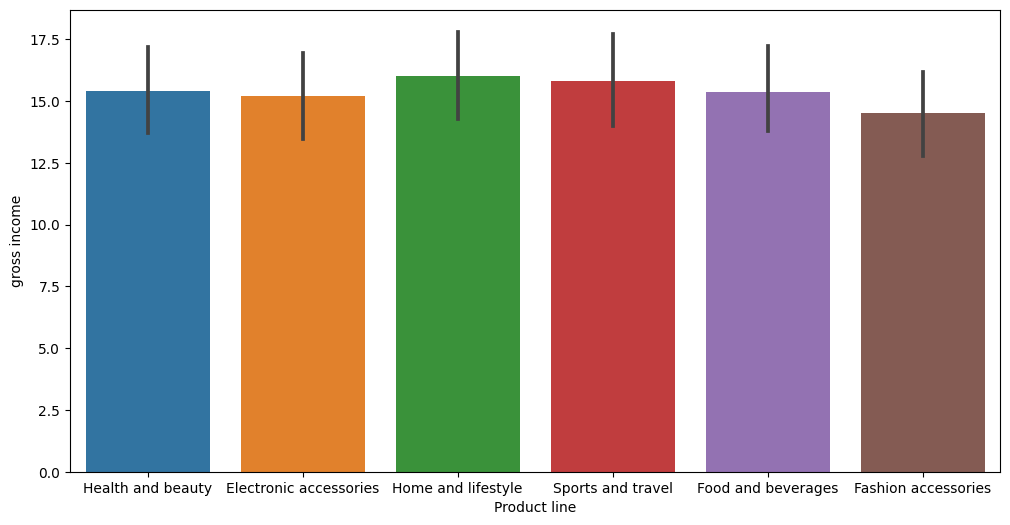

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['gross income']);

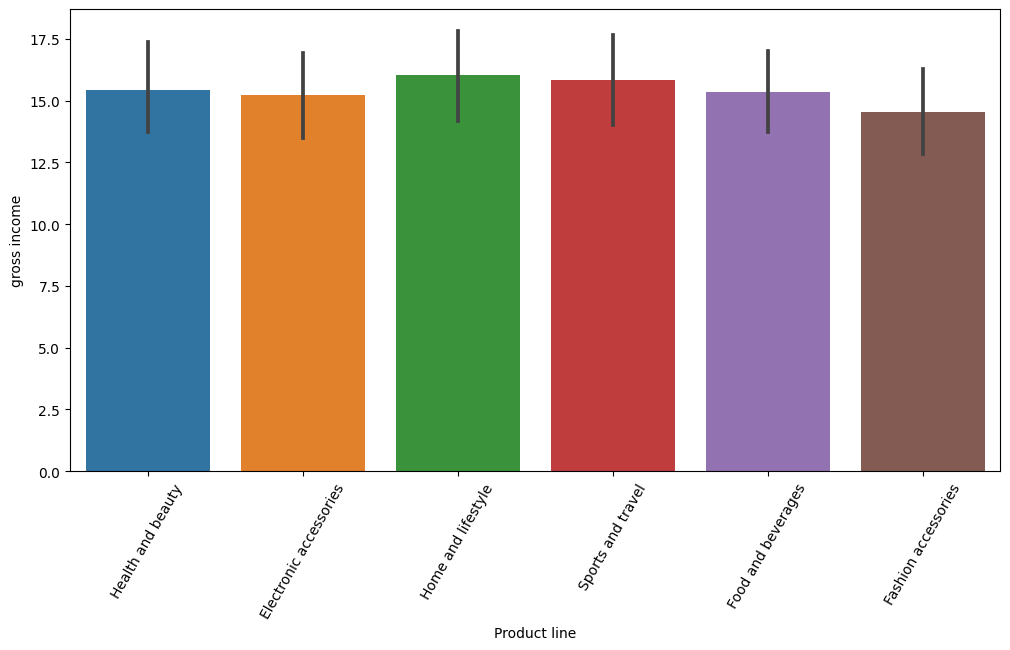

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['gross income'])
plt.xticks(rotation=60);

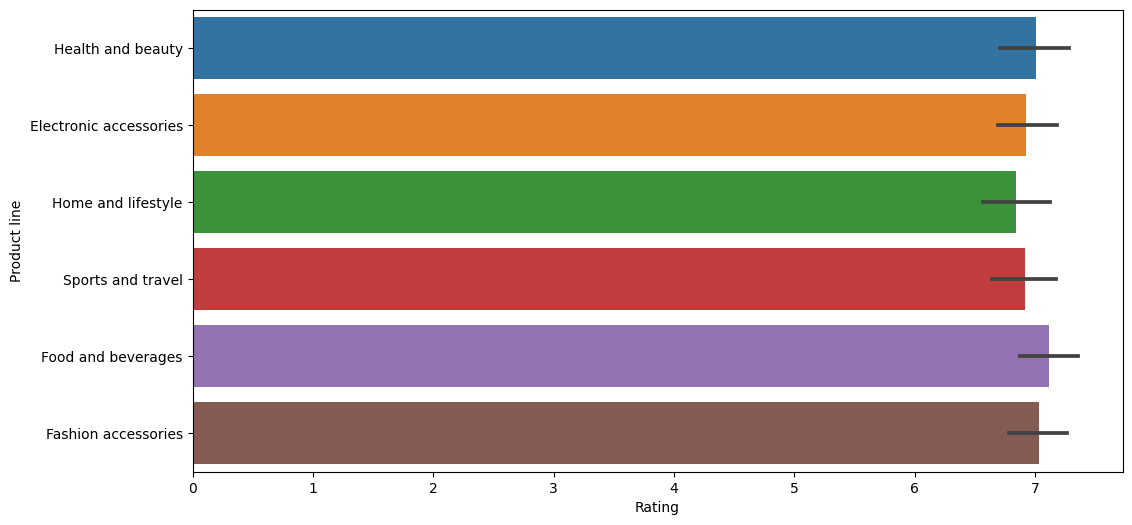

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['Product line'], x=df['Rating']);

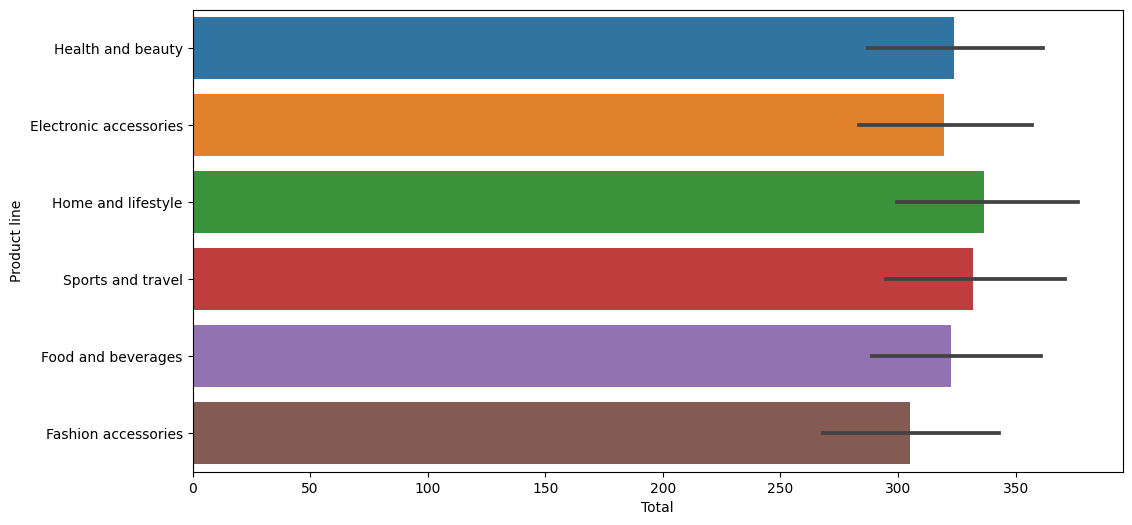

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'], y=df['Product line']);

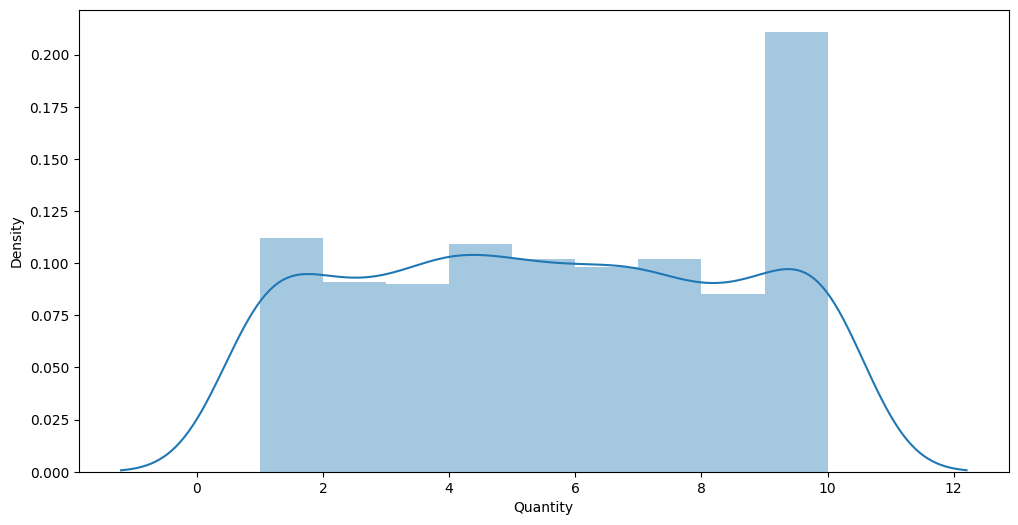

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Quantity']);

In [ ]:
df['Hour'].nunique()

11

In [ ]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [ ]:
df['weekday'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)